<a href="https://colab.research.google.com/github/Gunapriya90144/gunapriya/blob/main/Copy_of_copy_of_nm_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/air_quality.csv")
df.head()

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 0:00:00,9.0,9.0,3.0,17.0,300,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 1:00:00,4.0,4.0,3.0,16.0,300,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 5:00:00,4.0,4.0,9.0,25.0,300,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
3,2013-03-01 6:00:00,5.0,5.0,10.0,29.0,400,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
4,2013-03-01 7:00:00,3.0,6.0,12.0,40.0,400,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/air_quality.csv")
df = df.dropna()
df = df.drop_duplicates()
columns_to_scale = ['NO2', 'PM2.5', 'PM10', 'CO']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale] = df_scaled
print(df.head())

             date_time     PM2.5      PM10   SO2       NO2        CO    O3  \
0  2013-03-01 00:00:00 -0.900822 -1.085724   3.0 -1.085675 -0.853365  89.0   
1  2013-03-01 01:00:00 -0.961298 -1.138481   3.0 -1.114877 -0.853365  88.0   
2  2013-03-01 05:00:00 -0.961298 -1.138481   9.0 -0.852060 -0.853365  78.0   
3  2013-03-01 06:00:00 -0.949203 -1.127929  10.0 -0.735253 -0.769126  67.0   
4  2013-03-01 07:00:00 -0.973393 -1.117378  12.0 -0.414033 -0.769126  52.0   

   TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  -2.4  1027.5 -21.3   0.0   NW   2.4  Dongsi  
3  -2.5  1028.2 -20.4   0.0   NW   2.2  Dongsi  
4  -1.4  1029.5 -20.4   0.0  NNW   3.0  Dongsi  


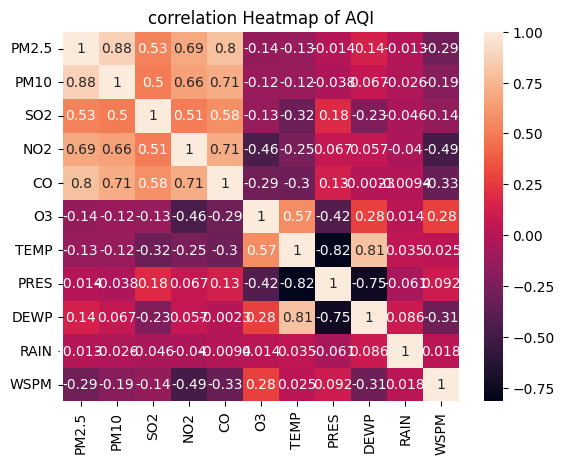

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/content/air_quality.csv")
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("correlation Heatmap of AQI")
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/air_quality.csv")
df['Total_PM'] = df['PM2.5'] + df['PM10']
print(df.head())

             date_time  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013-03-01 00:00:00    9.0   9.0   3.0  17.0  300.0  89.0  -0.5  1024.5   
1  2013-03-01 01:00:00    4.0   4.0   3.0  16.0  300.0  88.0  -0.7  1025.1   
2  2013-03-01 05:00:00    4.0   4.0   9.0  25.0  300.0  78.0  -2.4  1027.5   
3  2013-03-01 06:00:00    5.0   5.0  10.0  29.0  400.0  67.0  -2.5  1028.2   
4  2013-03-01 07:00:00    3.0   6.0  12.0  40.0  400.0  52.0  -1.4  1029.5   

   DEWP  RAIN   wd  WSPM station  Total_PM  
0 -21.4   0.0  NNW   5.7  Dongsi      18.0  
1 -22.1   0.0   NW   3.9  Dongsi       8.0  
2 -21.3   0.0   NW   2.4  Dongsi       8.0  
3 -20.4   0.0   NW   2.2  Dongsi      10.0  
4 -20.4   0.0  NNW   3.0  Dongsi       9.0  


In [ ]:
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/air_quality.csv")
X = df.drop(['date_time', 'PM2.5', 'wd', 'station'], axis=1)
y = df['PM2.5']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor()
model.fit(x_train, y_train)
print(df.head())

             date_time  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013-03-01 00:00:00    9.0   9.0   3.0  17.0  300.0  89.0  -0.5  1024.5   
1  2013-03-01 01:00:00    4.0   4.0   3.0  16.0  300.0  88.0  -0.7  1025.1   
2  2013-03-01 05:00:00    4.0   4.0   9.0  25.0  300.0  78.0  -2.4  1027.5   
3  2013-03-01 06:00:00    5.0   5.0  10.0  29.0  400.0  67.0  -2.5  1028.2   
4  2013-03-01 07:00:00    3.0   6.0  12.0  40.0  400.0  52.0  -1.4  1029.5   

   DEWP  RAIN   wd  WSPM station  
0 -21.4   0.0  NNW   5.7  Dongsi  
1 -22.1   0.0   NW   3.9  Dongsi  
2 -21.3   0.0   NW   2.4  Dongsi  
3 -20.4   0.0   NW   2.2  Dongsi  
4 -20.4   0.0  NNW   3.0  Dongsi  


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
df = pd.read_csv("/content/air_quality.csv")
predictions = model.predict(x_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R² Score:", r2_score(y_test, predictions))

RMSE: 20.488910212291888
R² Score: 0.9391198728812686


Initial Data Sample:
             date_time  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  \
0  2013-03-01 00:00:00    9.0   9.0   3.0  17.0  300.0  89.0  -0.5  1024.5   
1  2013-03-01 01:00:00    4.0   4.0   3.0  16.0  300.0  88.0  -0.7  1025.1   
2  2013-03-01 05:00:00    4.0   4.0   9.0  25.0  300.0  78.0  -2.4  1027.5   
3  2013-03-01 06:00:00    5.0   5.0  10.0  29.0  400.0  67.0  -2.5  1028.2   
4  2013-03-01 07:00:00    3.0   6.0  12.0  40.0  400.0  52.0  -1.4  1029.5   

   DEWP  RAIN   wd  WSPM station  
0 -21.4   0.0  NNW   5.7  Dongsi  
1 -22.1   0.0   NW   3.9  Dongsi  
2 -21.3   0.0   NW   2.4  Dongsi  
3 -20.4   0.0   NW   2.2  Dongsi  
4 -20.4   0.0  NNW   3.0  Dongsi  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95685 entries, 0 to 95684
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  95685 non-null  object 
 1   PM2.5      95685 non-null  float64
 2   PM10       

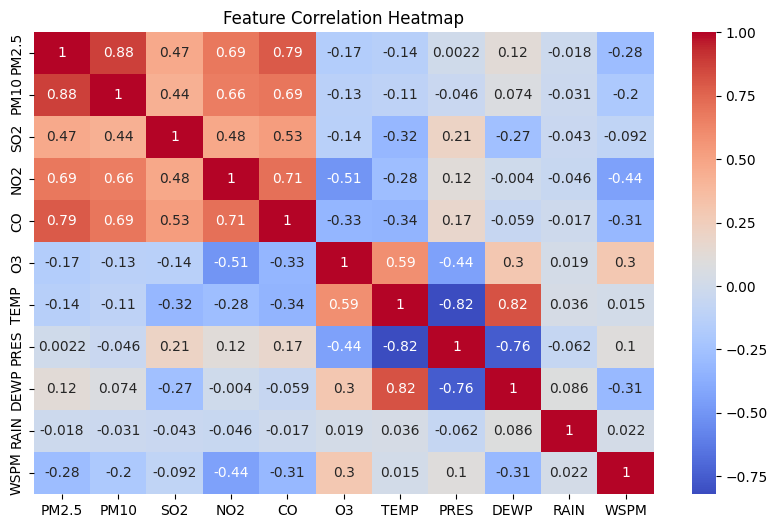

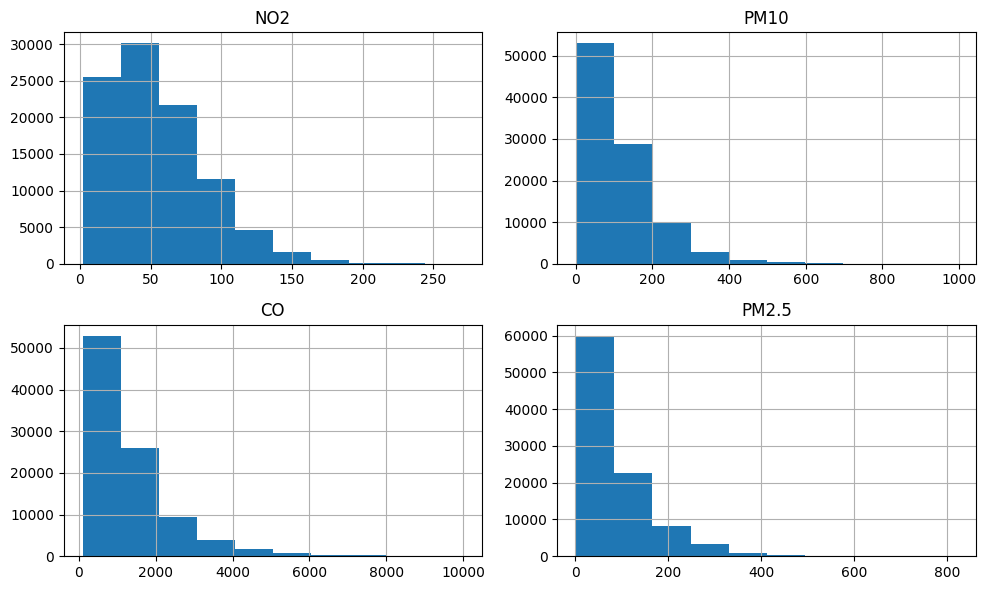

In [ ]:
# air_quality_prediction.py

# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# 2. Load and inspect dataset
df = pd.read_csv("/content/air_quality.csv")
print("Initial Data Sample:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# 3. Data Preprocessing
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Select relevant features
features = ['NO2', 'PM10', 'CO'] # Exclude PM2.5 from features if it's the target
# Changed target to 'PM2.5'
target = 'PM2.5'

# Standardize features
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled_values, columns=features)
# Assign the target column (PM2.5) to the scaled DataFrame
df_scaled[target] = df[target].values

# 4. Feature Engineering
# Create the 'Total_PM' feature using the original unscaled PM2.5 and PM10 columns
df_scaled['Total_PM'] = df['PM2.5'] + df['PM10']
# Update final_features to include the newly engineered feature and the original features used for scaling
final_features = ['NO2', 'PM10', 'CO', 'Total_PM'] # Make sure target (PM2.5) is NOT in the features

# 5. Train-Test Split
X = df_scaled[final_features]
y = df_scaled[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Building and Training
model = XGBRegressor()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "aqi_model.pkl")

# 7. Evaluation
y_pred = model.predict(X_test)
# Removed squared=False and took the square root of the result to get RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# 8. EDA (Optional Visuals)
plt.figure(figsize=(10, 6))
# Use the original df for correlation heatmap to see original relationships
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Use the original df for histograms
df[features + [target]].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()